In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
import matplotlib.animation as animation

# Pendulo Amortecido

$  \frac{d^2 \theta (t)}{dt^2} + b \frac{d \theta}{dt}(t) + \frac{g}{l} \sin(\theta(t)) = 0$

$ \frac{d \theta}{dt} = \omega$


$ \frac{d \omega}{dt}(t) + b \omega (t) + c \sin(\theta(t)) = 0$

## Solução por integração numérica da equação diferencial

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [4]:
# Equ differencial y[0] = theta , y[1] = omega
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [15]:
#constante de amortecimento:
b = 0.25
G = 9.8  # acceleration due to gravity, in m/s^2
L = 1.3  # length of pendulum in m
#initial conditions, phase, angular speed
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 10, 101)

In [18]:
sol = odeint(pend, y0, t, args=(b, G/L))

In [19]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


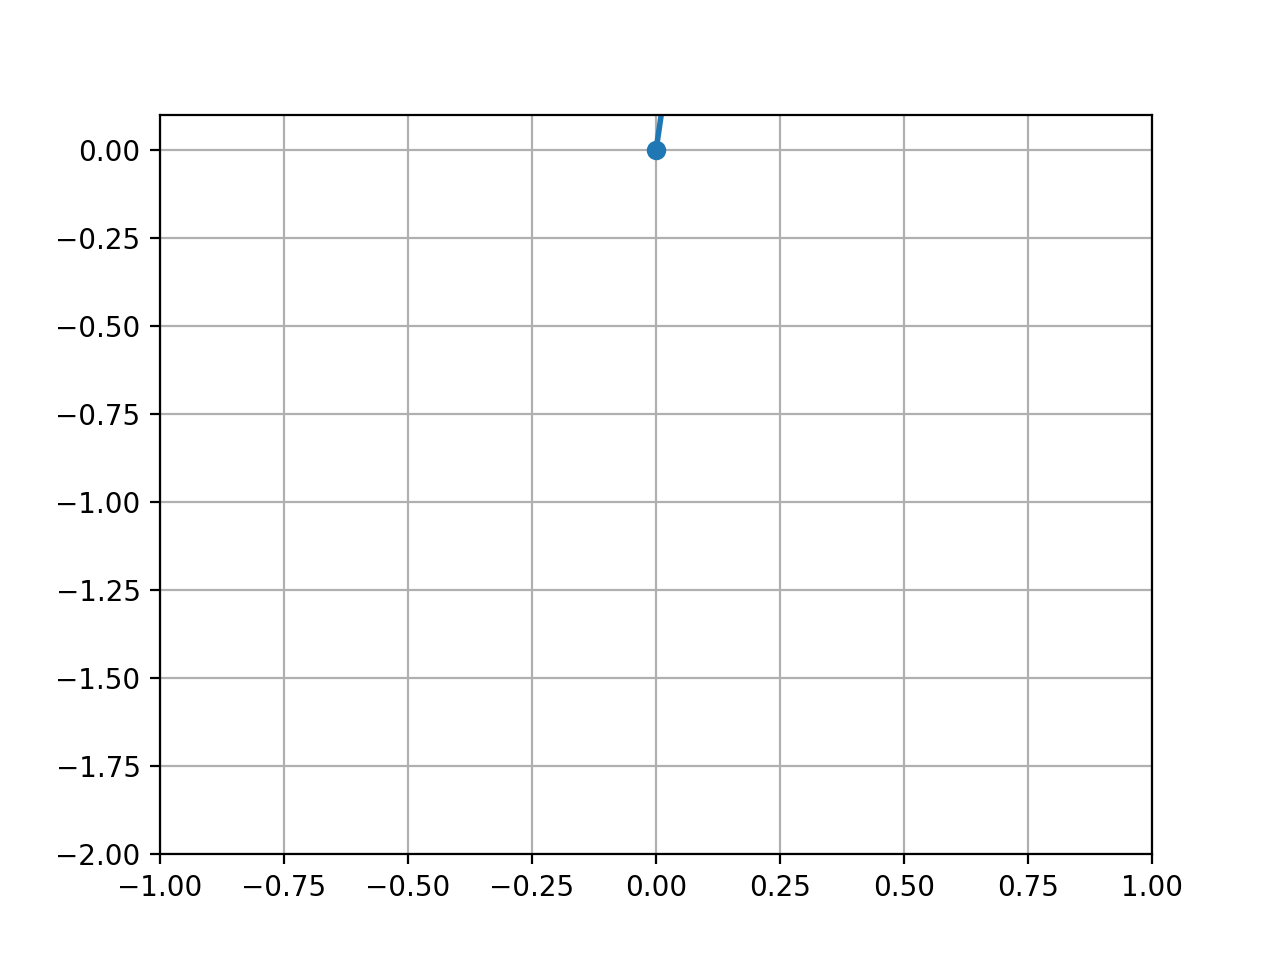

In [20]:
x1 = L*np.sin(sol[:, 0])
y1 = -L*np.cos(sol[:, 0])

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 1), ylim=(-2, 0.1))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i]]
    thisy = [0, y1[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                              interval=25, blit=True, init_func=init)

# ani.save('simple_pendulum.mp4', fps=15)
plt.show()

## Tempo de Reação

In [6]:
distQueda=np.array([0.10, 0.10, 0.09, 0.09, 0.08])
distQuedaMed=np.average(distQueda)
distQuedaDesvPad=np.std(distQueda, ddof=1)
#
g=9.80
tReac=np.sqrt(2*distQuedaMed / g) 
tReacDesvPad = tReac/2/distQuedaMed * distQuedaDesvPad

